In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.externals import joblib
from sklearn import tree
from sklearn.grid_search import GridSearchCV

/home/expertsvision/Desktop/GA_implemented_with_flask/server/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/expertsvision/Desktop/GA_implemented_with_flask/server/venv/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
def get_time(x, c1, c2):     #find the difference between two date columns of dataframe x
    diff =  x[c2] - x[c1]
    days = diff.days
    days_to_hours = days * 24
    diff_btw_two_times = (diff.seconds) / 3600
    overall_hours = days_to_hours + diff_btw_two_times
    return overall_hours

In [4]:
file = 'delivery_new_nov_2018.xlsx'
data = pd.ExcelFile(file)
df = data.parse('Order History_1')

In [5]:
col_names= ['Created Time', 'Delivered Time','Total Orders to Assign', 'Qty']
df.dropna(subset=col_names, how='any', inplace = True)
col_names= ['Created Time', 'Delivered Time']

In [18]:
info_taken = pd.DataFrame()
df['Created Time'] = df['Created Time']
df['Hours2deliver']= df.apply(get_time, c1='Created Time', c2='Delivered Time', axis=1)
df['PendingOrdersLocationWise']= df['Total Orders to Assign']
#df['LocationCode'], levels = pd.factorize(df['Location Code'])
#df['CustomerCode'], levels = pd.factorize(df['Customer Code'])
df['Location Code']
#df['Customer Code']

0       1673.0
1       1605.0
3       1660.0
4       1650.0
5       1645.0
6       1606.0
8       1627.0
9       1660.0
10      1660.0
11      1645.0
12      1660.0
13      1650.0
14      1673.0
15      1604.0
16      1601.0
17      1660.0
18      1660.0
19      1650.0
20      1664.0
21      1605.0
22      1641.0
23      1604.0
24      1645.0
25      1605.0
26      1605.0
28      1650.0
29      1641.0
31      1606.0
32      1601.0
33      1645.0
         ...  
2281    1650.0
2282    1604.0
2283    1605.0
2284    1673.0
2285    1601.0
2286    1605.0
2287    1625.0
2288    1606.0
2289    1415.0
2290    1604.0
2292    1605.0
2293    1631.0
2294    1415.0
2295    1601.0
2297    1673.0
2298    1606.0
2299    1625.0
2300    1641.0
2301    1673.0
2302    1660.0
2303    1660.0
2305    1605.0
2306    1627.0
2307    1605.0
2308    1653.0
2309    1604.0
2310    1673.0
2311    1606.0
2312    1625.0
2313    1645.0
Name: Location Code, Length: 2113, dtype: float64

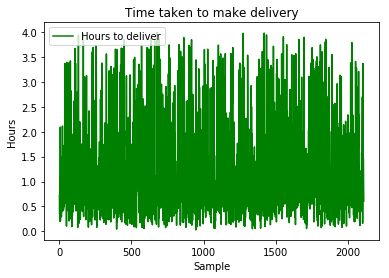

In [19]:
is_strange =  df['Hours2deliver']>4
df= df[~is_strange]
plt.plot(df['Hours2deliver'].values, color= 'green', label= 'Hours to deliver') # p
plt.ylabel('Hours')
plt.xlabel('Sample')
plt.title('Time taken to make delivery')
plt.legend()
plt.show()

In [36]:
timstamp_into_int = df['Created Time'].values.astype(int)
location_code = df[['Location Code', 'PendingOrdersLocationWise']].values
X = np.insert(location_code, 1,timstamp_into_int , axis=1)
Y = np.reshape(df['Hours2deliver'].values, -1)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.1, random_state=42)

In [37]:
tree_regression_model = tree.DecisionTreeRegressor(min_samples_split=25, max_depth=17, random_state=0)
trained_model = tree_regression_model.fit(X_trn, Y_trn)
joblib.dump(trained_model, 'model1_dt.sav')

['model1_dt.sav']

In [38]:
from sklearn.metrics import make_scorer
tree_regression_Model = tree.DecisionTreeRegressor(random_state=0)
scoring = make_scorer(r2_score)
parameters={'max_depth': np.arange(15, 30), 'min_samples_split':np.arange(15, 32)}
#cross_validation = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(tree_regression_Model, parameters, cv=15, n_jobs=4, refit=True, scoring=scoring,verbose=1)

In [39]:
#grid_search = tree.DecisionTreeRegressor(criterion='mae', random_state=0, max_depth=19, min_samples_split=45)
grid_search.fit(X_trn,Y_trn)

Fitting 15 folds for each of 255 candidates, totalling 3825 fits


[Parallel(n_jobs=4)]: Done 1232 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 3825 out of 3825 | elapsed:    4.5s finished


GridSearchCV(cv=15, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'min_samples_split': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])},
       pre_dispatch='2*n_jobs', refit=True, scoring=make_scorer(r2_score),
       verbose=1)

In [40]:
print(grid_search.best_params_)
print(grid_search.best_estimator_.feature_importances_)

{'max_depth': 16, 'min_samples_split': 22}
[0.28660106 0.57726026 0.13613868]


In [41]:
#predict_model = trained_model.predict(X_tst)
predict_model = grid_search.best_estimator_.predict(X_tst)

In [42]:
print("Mean squared error: "  )
mse= mean_squared_error(Y_tst, predict_model,)
print(mse)

print('r2')
r2 = r2_score(Y_tst, predict_model, sample_weight=None, multioutput='uniform_average')
print(r2)
adj_r2 = 1-(1-r2) * (X_tst.shape[0] -1)/(X_tst.shape[0]-X_tst.shape[1] -1)
adj_r2

Mean squared error: 
0.454569509693663
r2
0.291016085493353


0.2807903559571995

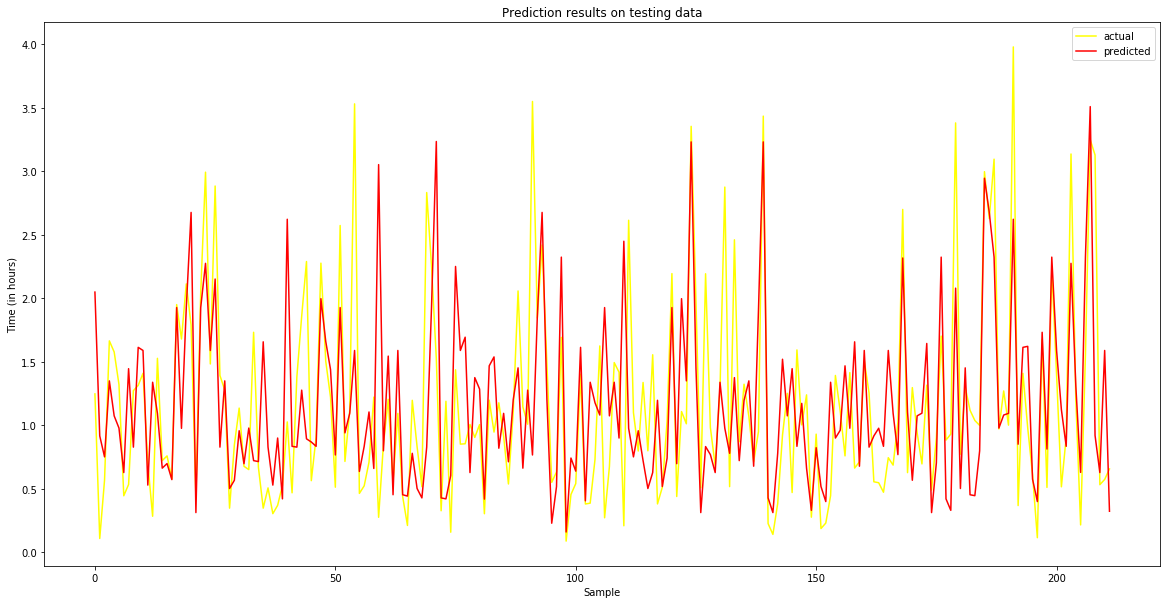

In [43]:
plt.figure(figsize=(20,10))
plt.plot(Y_tst, color= 'yellow', label= 'actual') # p
plt.plot(predict_model, color= 'red', label= 'predicted') # p
plt.xlabel('Sample')
plt.ylabel('Time (in hours)')
plt.title('Prediction results on testing data')
plt.legend()
plt.show()